### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().sum()
#data['car'].value_counts()
data['Bar'].value_counts()
#data['CoffeeHouse'].value_counts()
#data['CarryAway'].value_counts()
#data['RestaurantLessThan20'].value_counts()
#data['Restaurant20To50'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#data = data.dropna()
data_bar =  data.copy()
data_bar = data_bar.dropna(subset=['Bar', 'age'])
data_bar['age'] = data_bar['age'].astype(str)
data_bar['age'] = data_bar['age'].str.replace('50plus','50')
data_bar['age'] = data_bar['age'].str.replace('below21','20')
data_bar['age'] = data_bar['age'].astype(int)
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12577 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12577 non-null  object
 1   passanger             12577 non-null  object
 2   weather               12577 non-null  object
 3   temperature           12577 non-null  int64 
 4   time                  12577 non-null  object
 5   coupon                12577 non-null  object
 6   expiration            12577 non-null  object
 7   gender                12577 non-null  object
 8   age                   12577 non-null  int64 
 9   maritalStatus         12577 non-null  object
 10  has_children          12577 non-null  int64 
 11  education             12577 non-null  object
 12  occupation            12577 non-null  object
 13  income                12577 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



In [6]:
acceptPercent = data.query('Y ==1')['Y'].count()/data['Y'].count()
acceptPercent

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

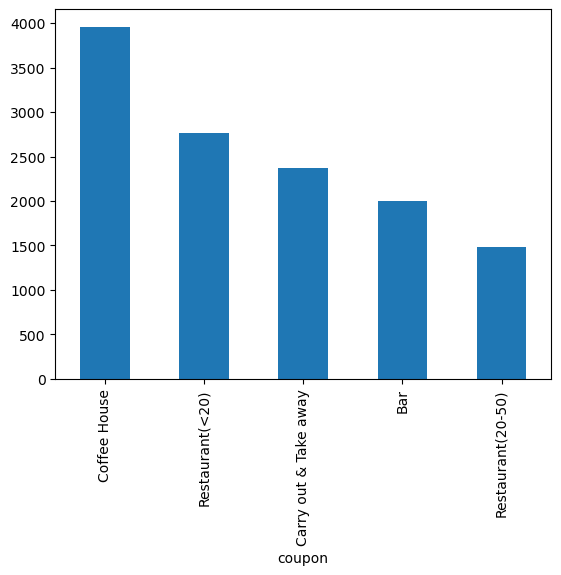

In [7]:
coupon = data_bar['coupon'].value_counts()
coupon.plot(kind ='bar')

6. Use a histogram to visualize the temperature column.

<Axes: >

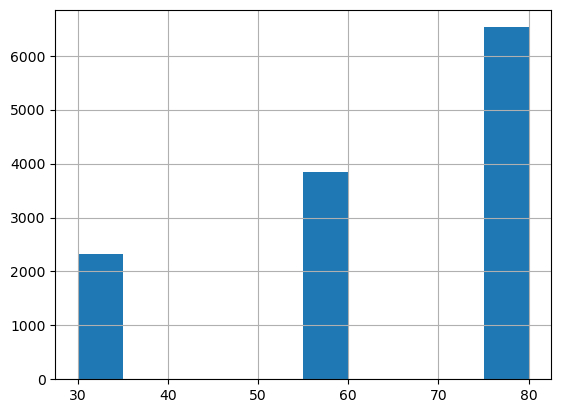

In [8]:
data['temperature'].hist()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:

bar_coupon_data = data_bar[data_bar['coupon'] == "Bar"]
bar_coupon_data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [10]:
accepted_bar_coupons = bar_coupon_data.query('Y == 1')['Y'].count()/ bar_coupon_data['Y'].count()
accepted_bar_coupons

0.4103206412825651

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:

lessThan3BarValues = ['never','less1','1~3']
bar_coupon_less_than_3 = bar_coupon_data.query('Bar in @lessThan3BarValues')
bar_coupon_less_than_3_accpt = bar_coupon_less_than_3.query('Y == 1')['Y'].count()/ bar_coupon_less_than_3['Y'].count()
bar_coupon_more_than_3 = bar_coupon_data.query('Bar not in @lessThan3BarValues')
bar_coupon_more_than_3_accpt = bar_coupon_more_than_3.query('Y == 1')['Y'].count()/ bar_coupon_more_than_3['Y'].count()
print(bar_coupon_less_than_3_accpt,bar_coupon_more_than_3_accpt)

0.37061769616026713 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
moreThanOnceBarValues = ['1~3','gt8','4~8']
query_condition = (bar_coupon_data['Bar'].isin(moreThanOnceBarValues)) & (bar_coupon_data['age'] >25)
bar_coupon_more_than_once_over_25 =  bar_coupon_data[query_condition]
bar_coupon_more_than_once_over_25_accpt = bar_coupon_more_than_once_over_25.query('Y == 1')['Y'].count()/ bar_coupon_more_than_once_over_25['Y'].count()
bar_coupon_others = bar_coupon_data[~query_condition]
bar_coupon_others_accpt = bar_coupon_others.query('Y == 1')['Y'].count()/ bar_coupon_others['Y'].count()
print(bar_coupon_more_than_once_over_25_accpt, bar_coupon_others_accpt)


0.6952380952380952 0.3343908629441624


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
moreThanOnceBarValues = ['1~3','gt8','4~8']
query_condition = (bar_coupon_data['Bar'].isin(moreThanOnceBarValues)) & (bar_coupon_data['passanger'] != 'Kid(s)') &(bar_coupon_data['occupation'] != 'Farming Fishing & Forestry')
bar_coupon_more_than_once_no_kids_not_farming =  bar_coupon_data[query_condition]
bar_coupon_more_than_once_no_kids_not_farming_accpt = bar_coupon_more_than_once_no_kids_not_farming.query('Y == 1')['Y'].count()/ bar_coupon_more_than_once_no_kids_not_farming['Y'].count()
bar_coupon_others = bar_coupon_data[~query_condition]
bar_coupon_others_accpt = bar_coupon_others.query('Y == 1')['Y'].count()/ bar_coupon_others['Y'].count()
print(bar_coupon_more_than_once_no_kids_not_farming_accpt, bar_coupon_others_accpt)


0.7132486388384754 0.2948096885813149


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
moreThanOnceBarValues = ['1~3','gt8','4~8']
moreThan50kIncome = ['$100000 or More','$50000 - $62499','$75000 - $87499','$87500 - $99999','$62500 - $74999']
bar_coupon_data['RestaurantLessThan20'].value_counts()
moreThan4RestValues = ['gt8','4~8']
query_condition1 = (bar_coupon_data['Bar'].isin(moreThanOnceBarValues)) & (bar_coupon_data['passanger'] != 'Kid(s)') & (bar_coupon_data['maritalStatus'] != 'Widowed') 
query_condition2 =  (bar_coupon_data['Bar'].isin(moreThanOnceBarValues)) & (bar_coupon_data['age'] < 30)
query_condition3 =  (bar_coupon_data['RestaurantLessThan20'].isin(moreThan4RestValues)) & (bar_coupon_data['income'].isin(moreThan50kIncome))
bar_coupon_multiple_conditions = bar_coupon_data[query_condition1 | query_condition2 | query_condition3]
bar_coupon_multiple_accpt = bar_coupon_multiple_conditions.query('Y == 1')['Y'].count()/ bar_coupon_multiple_conditions['Y'].count()
print(bar_coupon_multiple_accpt)


0.572639225181598


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
#People who received coupons for high cost restaurants
high_cost_rest_data = data.copy()
high_cost_rest_data = high_cost_rest_data.dropna(subset=['Restaurant20To50', 'age'])
high_cost_rest_coupon_data = high_cost_rest_data[high_cost_rest_data['coupon'] == "Restaurant(20-50)"]
high_cost_rest_coupon_data.head(10)
high_cost_rest_coupon_data.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     1456
Bar                        8
CoffeeHouse               23
CarryAway                 12
RestaurantLessThan20      10
Restaurant20To50           0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
dtype: int64




Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.






In [21]:
#What proportion of HighCostRestaurant coupons were accepted?
high_cost_rest_coupon_accpt = high_cost_rest_coupon_data.query('Y == 1')['Y'].count()/ high_cost_rest_coupon_data['Y'].count()
print(high_cost_rest_coupon_accpt)




0.44285714285714284


In [27]:
#Compare the acceptance rate between those who went to a high cost restaurant 3 or fewer times a month to those who went more.
lessThan3Values = ['never','less1','1~3']
high_cost_rest_less_than_3 = high_cost_rest_coupon_data[high_cost_rest_coupon_data['Restaurant20To50'].isin(lessThan3Values)]
high_cost_rest_more_than_3 = high_cost_rest_coupon_data[~high_cost_rest_coupon_data['Restaurant20To50'].isin(lessThan3Values)]
high_cost_rest_less_than_3_accpt = high_cost_rest_less_than_3.query('Y == 1')['Y'].count()/ high_cost_rest_less_than_3['Y'].count()
high_cost_rest_more_than_3_accpt = high_cost_rest_more_than_3.query('Y == 1')['Y'].count()/ high_cost_rest_more_than_3['Y'].count()
print(high_cost_rest_less_than_3_accpt,high_cost_rest_more_than_3_accpt)



0.42464736451373425 0.6422764227642277


In [32]:
#Compare the acceptance rate between drivers who go to a high cost restaurant more than once a month and have an income of 50k or more to the all others.
high_cost_rest_coupon_data['income'].value_counts()
moreThankOnceValues = ['1~3','gt8','4~8']
moreThan50kIncome = ['$100000 or More','$50000 - $62499','$75000 - $87499','$87500 - $99999','$62500 - $74999']
more_than_3_inc_more_thank_50k_cond = (high_cost_rest_coupon_data['Restaurant20To50'].isin(moreThankOnceValues)) & (high_cost_rest_coupon_data['income'].isin(moreThan50kIncome))
high_cost_rest_more_than_3_inc_more_than_50k = high_cost_rest_coupon_data[more_than_3_inc_more_thank_50k_cond]
high_cost_rest_other = high_cost_rest_coupon_data[~more_than_3_inc_more_thank_50k_cond]
high_cost_rest_more_than_3_inc_more_than_50k_accpt =  high_cost_rest_more_than_3_inc_more_than_50k.query('Y == 1')['Y'].count()/ high_cost_rest_more_than_3_inc_more_than_50k['Y'].count()
high_cost_rest_other_accpt =  high_cost_rest_other.query('Y == 1')['Y'].count()/ high_cost_rest_other['Y'].count()
print(high_cost_rest_more_than_3_inc_more_than_50k_accpt,high_cost_rest_other_accpt)


0.5412186379928315 0.41981528127623846


In [34]:
#Use the same process to compare the acceptance rate between drivers who go to high cost restaurant  more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

moreThankOnceValues = ['1~3','gt8','4~8']
query_condition = (high_cost_rest_coupon_data['Restaurant20To50'].isin(moreThankOnceValues)) & (high_cost_rest_coupon_data['passanger'] != 'Kid(s)') &(high_cost_rest_coupon_data['occupation'] != 'Farming Fishing & Forestry')
high_cost_res_coupon_more_than_once_no_kids_not_farming =  high_cost_rest_coupon_data[query_condition]
high_cost_res_coupon_more_than_once_no_kids_not_farming_accpt = high_cost_res_coupon_more_than_once_no_kids_not_farming.query('Y == 1')['Y'].count()/ high_cost_res_coupon_more_than_once_no_kids_not_farming['Y'].count()
high_cost_res_coupon_others = high_cost_rest_coupon_data[~query_condition]
high_cost_res_coupon_others_accpt = high_cost_res_coupon_others.query('Y == 1')['Y'].count()/ high_cost_res_coupon_others['Y'].count()
print(high_cost_res_coupon_more_than_once_no_kids_not_farming_accpt, high_cost_res_coupon_others_accpt)








0.5756207674943566 0.38558909444985395


In [36]:
#Use the same process to compare the acceptance rate between drivers who go to high cost restaurant  more than once a month and had no passengers and had occupations other than farming, fishing, or forestry.


moreThankOnceValues = ['1~3','gt8','4~8']
query_condition = (high_cost_rest_coupon_data['Restaurant20To50'].isin(moreThankOnceValues)) & (high_cost_rest_coupon_data['passanger'] == 'Alone') &(high_cost_rest_coupon_data['occupation'] != 'Farming Fishing & Forestry')


high_cost_res_coupon_more_than_once_alone_not_farming =  high_cost_rest_coupon_data[query_condition]
high_cost_res_coupon_more_than_once_alone_not_farming_accpt = high_cost_res_coupon_more_than_once_alone_not_farming.query('Y == 1')['Y'].count()/ high_cost_res_coupon_more_than_once_alone_not_farming['Y'].count()
high_cost_res_coupon_others = high_cost_rest_coupon_data[~query_condition]
high_cost_res_coupon_others_accpt = high_cost_res_coupon_others.query('Y == 1')['Y'].count()/ high_cost_res_coupon_others['Y'].count()
print(high_cost_res_coupon_more_than_once_alone_not_farming_accpt, high_cost_res_coupon_others_accpt)





0.5465465465465466 0.4124890061565523


In [45]:
#Use the same process to compare the acceptance rate between drivers who go to high cost restaurant  more than once a month and had no kid passengers but were not traveling alone and had occupations other than farming, fishing, or forestry.


moreThankOnceValues = ['1~3','gt8','4~8']
notKidsOrAloneValues = ['Friends','Partner']

query_condition = (high_cost_rest_coupon_data['Restaurant20To50'].isin(moreThankOnceValues)) & (high_cost_rest_coupon_data['passanger'].isin(notKidsOrAloneValues)) &(high_cost_rest_coupon_data['occupation'] != 'Farming Fishing & Forestry')

high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming =  high_cost_rest_coupon_data[query_condition]
high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming_accpt = high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming.query('Y == 1')['Y'].count()/ high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming['Y'].count()
high_cost_res_coupon_others = high_cost_rest_coupon_data[~query_condition]
high_cost_res_coupon_others_accpt = high_cost_res_coupon_others.query('Y == 1')['Y'].count()/ high_cost_res_coupon_others['Y'].count()
print(high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming_accpt, high_cost_res_coupon_others_accpt)




0.7692307692307693 0.4308885754583921


In [46]:
#Use the same process to compare the acceptance rate between drivers who go to high cost restaurant  more than once a month  but were not traveling alone and had occupations other than farming, fishing, or forestry.


moreThankOnceValues = ['1~3','gt8','4~8']
notAloneValues = ['Friends','Partner','Kid(s)']

query_condition = (high_cost_rest_coupon_data['Restaurant20To50'].isin(moreThankOnceValues)) & (high_cost_rest_coupon_data['passanger'].isin(notAloneValues)) &(high_cost_rest_coupon_data['occupation'] != 'Farming Fishing & Forestry')

high_cost_res_coupon_more_than_once_not_alone_not_farming =  high_cost_rest_coupon_data[query_condition]
high_cost_res_coupon_more_than_once_not_alone_not_farming_accpt = high_cost_res_coupon_more_than_once_not_alone_not_farming.query('Y == 1')['Y'].count()/ high_cost_res_coupon_more_than_once_not_alone_not_farming['Y'].count()
high_cost_res_coupon_others = high_cost_rest_coupon_data[~query_condition]
high_cost_res_coupon_others_accpt = high_cost_res_coupon_others.query('Y == 1')['Y'].count()/ high_cost_res_coupon_others['Y'].count()
print(high_cost_res_coupon_more_than_once_not_alone_not_farming_accpt, high_cost_res_coupon_others_accpt)




0.5739130434782609 0.4317343173431734


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Catagory         6 non-null      object 
 1   Acceptance_Rate  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes


<Axes: xlabel='Catagory'>

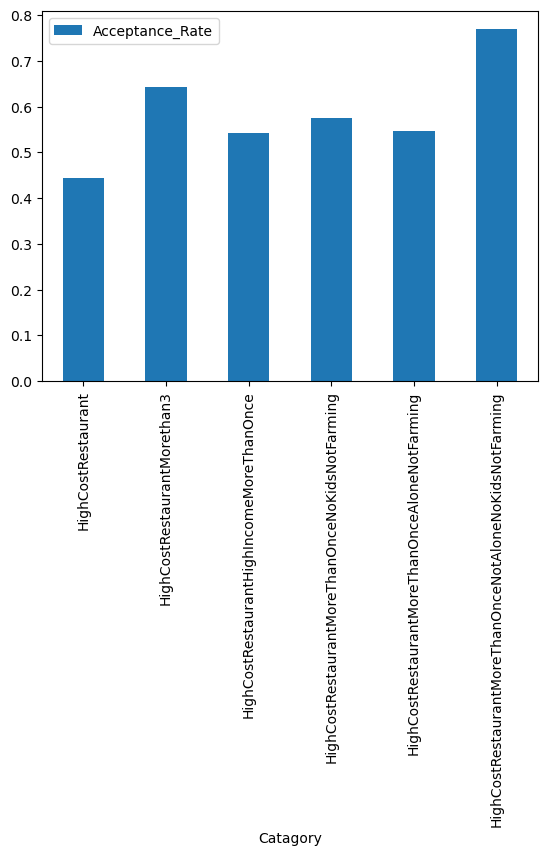

In [58]:
AcceptancedDataDict = {
    'Catagory': ['HighCostRestaurant', 'HighCostRestaurantMorethan3', 'HighCostRestaurantHighIncomeMoreThanOnce', 'HighCostRestaurantMoreThanOnceNoKidsNotFarming', 'HighCostRestaurantMoreThanOnceAloneNotFarming','HighCostRestaurantMoreThanOnceNotAloneNoKidsNotFarming'],
    'Acceptance_Rate': [high_cost_rest_coupon_accpt, high_cost_rest_more_than_3_accpt, high_cost_rest_more_than_3_inc_more_than_50k_accpt, high_cost_res_coupon_more_than_once_no_kids_not_farming_accpt, high_cost_res_coupon_more_than_once_alone_not_farming_accpt,high_cost_res_coupon_more_than_once_not_alone_no_kids_not_farming_accpt]
}
AcceptancedData = pd.DataFrame(AcceptancedDataDict)
AcceptancedData['Acceptance_Rate'] = AcceptancedData['Acceptance_Rate'].astype(float)
AcceptancedData.info()
AcceptancedData.head()
AcceptancedData.plot(kind ='bar', x = 'Catagory')


The above plot makes it very apparent that people who travel with a passenger but no kids, and are not working in the Farming Fishing & Forestry industry and who already visits expensive retaurants more than once a month tend to accept the coupons more(77%). They are folloed closely by people who goes to expensive restaurants more than 3 times a month(64%).